In [1]:
!pip install pyforest
# Install common Python packages


In [2]:
import pyforest #import modules

In [3]:
train=pd.read_csv("train.csv") 
test=pd.read_csv("test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Know your Data

In [4]:
train.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Regression Analysis: Factors Influencing Housing Prices

## Objective
The primary objective of this analysis is to identify the key factors affecting house prices (`SalePrice`) using regression analysis. By understanding these factors, we aim to create a predictive model that accurately estimates property values.

## Data Features Overview
The dataset contains the following features that will be used to analyze the impact on housing prices:

| Feature Category         | Features Included |
|--------------------------|------------------|
| **Basic Property Details** | `Id`, `MSSubClass`, `MSZoning`, `LotFrontage`, `LotArea`, `Street`, `Alley` |
| **Land Characteristics** | `LotShape`, `LandContour`, `Utilities`, `LotConfig`, `LandSlope` |
| **Location** | `Neighborhood`, `Condition1`, `Condition2` |
| **Building Details** | `BldgType`, `HouseStyle`, `OverallQual`, `OverallCond`, `YearBuilt`, `YearRemodAdd` |
| **Roof and Exterior** | `RoofStyle`, `RoofMatl`, `Exterior1st`, `Exterior2nd`, `MasVnrType`, `MasVnrArea`, `ExterQual`, `ExterCond` |
| **Basement Details** | `Foundation`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinSF1`, `BsmtFinType2`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF` |
| **Heating and Cooling** | `Heating`, `HeatingQC`, `CentralAir`, `Electrical` |
| **Living Area** | `1stFlrSF`, `2ndFlrSF`, `LowQualFinSF`, `GrLivArea` |
| **Bathrooms and Bedrooms** | `BsmtFullBath`, `BsmtHalfBath`, `FullBath`, `HalfBath`, `BedroomAbvGr`, `KitchenAbvGr` |
| **Kitchen Quality** | `KitchenQual` |
| **Rooms and Functionality** | `TotRmsAbvGrd`, `Functional` |
| **Fireplace and Garage** | `Fireplaces`, `FireplaceQu`, `GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageCars`, `GarageArea`, `GarageQual`, `GarageCond` |
| **Porch and Deck** | `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch` |
| **Miscellaneous** | `PoolArea`, `PoolQC`, `Fence`, `MiscFeature`, `MiscVal`, `PavedDrive` |
| **Sale Information** | `MoSold`, `YrSold`, `SaleType`, `SaleCondition`, `SalePrice` |

## Feature Importance Table
The following table ranks features based on their subjective probability of influencing the `SalePrice` of the house. The importance levels are categorized into **High**, **Medium**, **Low**, and **Minimal**.

| Feature                | Importance Level  | Subjective Probability |
|------------------------|------------------|-----------------------|
| **OverallQual**        | High             | 0.95                  |
| **GrLivArea**          | High             | 0.90                  |
| **TotalBsmtSF**        | High             | 0.85                  |
| **YearBuilt**          | High             | 0.80                  |
| **GarageCars**         | High             | 0.80                  |
| **GarageArea**         | High             | 0.78                  |
| **1stFlrSF**           | High             | 0.75                  |
| **FullBath**           | High             | 0.72                  |
| **KitchenQual**        | High             | 0.70                  |
| **Neighborhood**       | Medium           | 0.65                  |
| **YearRemodAdd**       | Medium           | 0.60                  |
| **ExterQual**          | Medium           | 0.58                  |
| **BsmtQual**           | Medium           | 0.55                  |
| **GarageFinish**       | Medium           | 0.53                  |
| **Foundation**         | Medium           | 0.50                  |
| **Fireplaces**         | Medium           | 0.48                  |
| **MasVnrArea**         | Medium           | 0.45                  |
| **LotArea**            | Medium           | 0.43                  |
| **CentralAir**         | Medium           | 0.42                  |
| **BsmtFinSF1**         | Medium           | 0.40                  |
| **HalfBath**           | Low              | 0.35                  |
| **TotRmsAbvGrd**       | Low              | 0.32                  |
| **HouseStyle**         | Low              | 0.30                  |
| **MSZoning**           | Low              | 0.28                  |
| **Exterior1st**        | Low              | 0.27                  |
| **LotConfig**          | Low              | 0.25                  |
| **Condition1**         | Low              | 0.23                  |
| **RoofStyle**          | Low              | 0.22                  |
| **BsmtExposure**       | Low              | 0.20                  |
| **Functional**         | Low              | 0.18                  |
| **GarageType**         | Low              | 0.17                  |
| **SaleCondition**      | Low              | 0.15                  |
| **PavedDrive**         | Minimal          | 0.10                  |
| **LandContour**        | Minimal          | 0.08                  |
| **MoSold**             | Minimal          | 0.07                  |
| **YrSold**             | Minimal          | 0.06                  |
| **Electrical**         | Minimal          | 0.05                  |
| **MSSubClass**         | Minimal          | 0.04                  |
| **LotShape**           | Minimal          | 0.03                  |
| **Street**             | Minimal          | 0.02                  |
| **Alley**              | Minimal          | 0.01                  |
| **MiscFeature**        | Minimal          | 0.01                  |
| **PoolQC**             | Minimal          | 0.01                  |
| **Fence**              | Minimal          | 0.01                  |
| **MiscVal**            | Minimal          | 0.01                  |
| **Condition2**         | Minimal          | 0.01                  |

## Analysis Approach
1. **Data Cleaning:** Handle missing values, outliers, and inconsistencies to ensure the dataset is suitable for analysis.
2. **Feature Engineering:** Create new features or transform existing ones to better capture the relationships with `SalePrice`.
3. **Exploratory Data Analysis (EDA):** Visualize the distribution of variables and their correlation with `SalePrice`.
4. **Regression Model:** Use linear regression or other advanced regression techniques to quantify the relationship between features and `SalePrice`.
5. **Model Evaluation:** Assess the model's performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
6. **Feature Importance Analysis:** Revisit the features' importance to fine-tune the model for better prediction accuracy.

## Conclusion
Identifying the features that significantly influence the `SalePrice` can help build a robust predictive model. Focusing on high and medium-importance features will lead to more accurate and reliable predictions, while low and minimal features can still provide valuable insights in specific cases.

## Recommendations
- Prioritize the collection of detailed data for **high** and **medium** importance features for better model accuracy.
- Consider using advanced feature selection techniques to focus on the most relevant variables.
- Continuously monitor and update the model as new data becomes available to improve its performance.



In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# get more info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train.shape

(1460, 81)

In [9]:
# Calculate the percentage of missing values for each column
null_percentage = train.isnull().mean() * 100

# Filter columns that have missing values
missing_data = null_percentage[null_percentage > 0].sort_values()

# Display columns with missing values and their corresponding percentage
if not missing_data.empty:
    print(missing_data)
else:
    print("No missing values in the dataset.")


Electrical       0.068493
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
MasVnrType      59.726027
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64


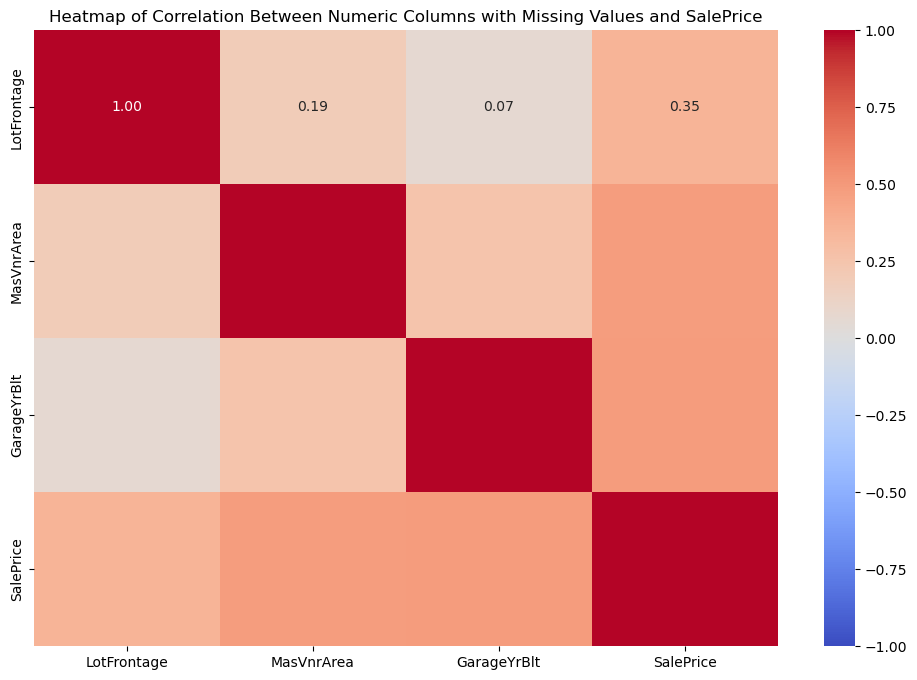

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify columns with missing values
missing_data_columns = train.columns[train.isnull().any()]

# Filter only numeric columns with missing values
numeric_missing_data_columns = [col for col in missing_data_columns if train[col].dtype != 'object']

# Add 'SalePrice' to the list of columns to visualize correlations
columns_to_analyze = numeric_missing_data_columns + ['SalePrice']

# Create a correlation matrix for the selected columns
correlation_matrix = train[columns_to_analyze].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Between Numeric Columns with Missing Values and SalePrice')
plt.show()


In [11]:
# create a copy of train 
df_train=train
df_test=test

### CLean Data Based on Null Values

In [12]:
# Identify columns with missing values
missing_data_columns = df_train.columns[df_train.isnull().any()]

# Drop numeric columns with missing values
numeric_missing_data_columns = [col for col in missing_data_columns if df_train[col].dtype != 'object']
df_train = df_train.drop(columns=numeric_missing_data_columns, axis=1)
df_test = df_test.drop(columns=numeric_missing_data_columns, axis=1)

# Display the DataFrame after dropping the columns
df_train.head()


,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# Calculate the percentage of missing values for each column
missing_percentage = df_train.isnull().mean() * 100

# Identify columns with more than 15% missing values
columns_to_drop = missing_percentage[missing_percentage > 15].index

# Drop the identified columns from the dataset
df_train = df_train.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)

# Display the columns that were dropped
print(f"Columns dropped due to more than 15% missing values:\n{columns_to_drop}")


Columns dropped due to more than 15% missing values:
Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [14]:
null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].head(7)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA
2,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
3,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA
4,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
5,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,Unf,TA,TA
6,Ex,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA


In [15]:
df_train.shape, df_test.shape

((1460, 72), (1459, 71))

### Fill Missing Values

In [16]:

# Create an instance of SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Nill')

# Fit the imputer on the training data and transform both the training and test data
df_train[null_columns] = imputer.fit_transform(df_train[null_columns])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

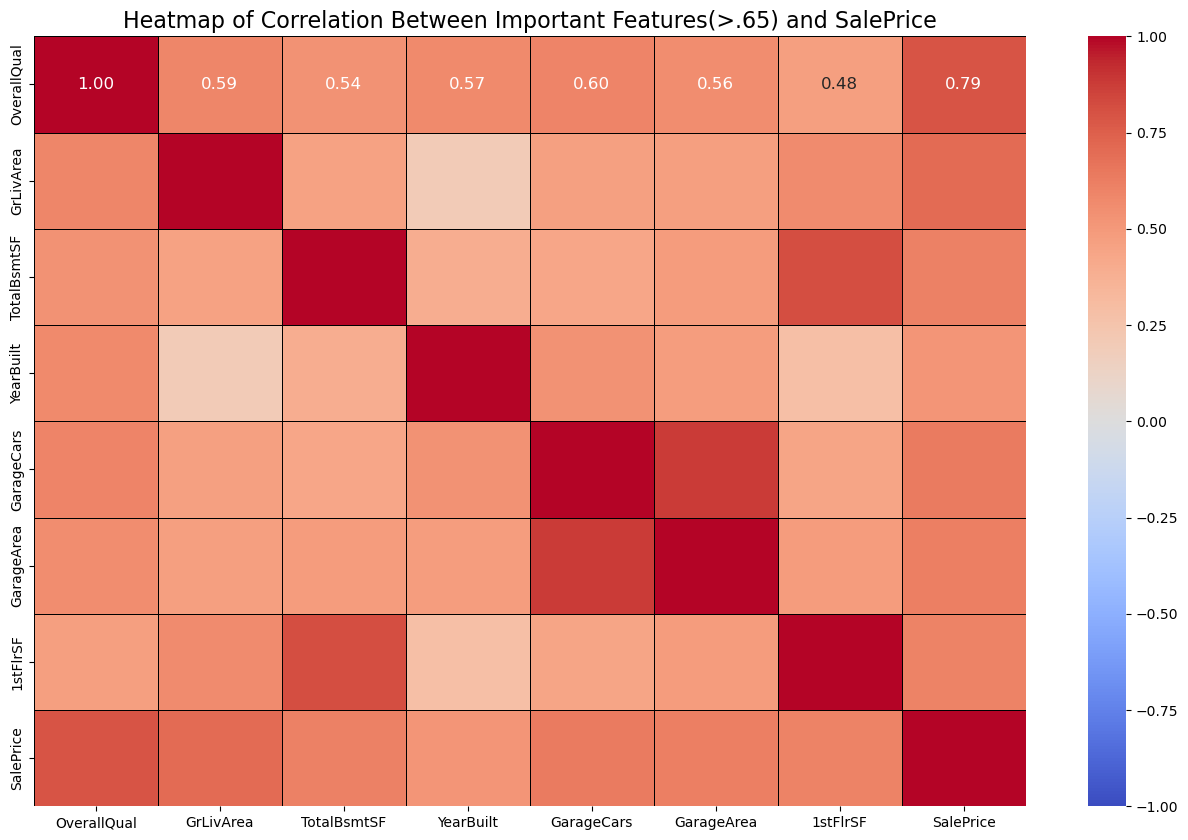

In [17]:
# Applying empirical analysis on the highly important features on saleprice based on Subjective evidence
# List of important features based on subjective analysis
df_importance = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageCars', 'GarageArea', '1stFlrSF', 'SalePrice']

# Create a correlation matrix for the selected columns
correlation_matrix = df_train[df_importance].corr()

# Plot the heatmap
plt.figure(figsize=(16, 10))  # Increase the figure size for better visibility
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1,
            annot_kws={"size": 12},  # Increase font size of annotations
            linewidths=0.5,  # Add lines between boxes
            linecolor='black')  # Color of the lines

plt.title('Heatmap of Correlation Between Important Features(>.65) and SalePrice', fontsize=16)
plt.show()

# Analysis of the Heatmap: Correlation Between Important Features and SalePrice

The heatmap shows the correlation between various features and the target variable, `SalePrice`. Each cell contains a numerical value representing the strength and direction of the correlation between a pair of features. Here is a breakdown of how the features relate to `SalePrice` based on the heatmap:

### 1. **OverallQual**:
   - **Correlation: 0.79**
   - This is the strongest predictor of `SalePrice` among the features. A higher quality of overall construction (as represented by `OverallQual`) leads to a significant increase in sale price. This suggests that buyers are willing to pay a premium for homes with better construction quality.

### 2. **GrLivArea** (Ground Living Area):
   - **Correlation: 0.59**
   - The size of the ground living area has a moderately strong positive correlation with `SalePrice`. Larger living spaces increase the price of a house, which aligns with common expectations in real estate.

### 3. **TotalBsmtSF** (Total Basement Square Footage):
   - **Correlation: 0.54**
   - A moderately strong correlation indicates that larger basement areas generally contribute to a higher sale price. Homes with more usable basement space are perceived as more valuable.

### 4. **YearBuilt**:
   - **Correlation: 0.57**
   - The year the house was built shows a moderate positive correlation with `SalePrice`. Newer houses tend to sell for higher prices compared to older ones, likely due to modern designs and better construction standards.

### 5. **GarageCars** (Number of Garage Cars):
   - **Correlation: 0.60**
   - The number of cars a garage can hold is also strongly correlated with `SalePrice`. This indicates that buyers prefer homes with more garage space, likely due to practical concerns such as car storage and protection.

### 6. **GarageArea**:
   - **Correlation: 0.56**
   - The size of the garage correlates well with the sale price, similar to `GarageCars`. This implies that the total garage space, in terms of area, is a contributing factor to the home’s overall value.

### 7. **1stFlrSF** (First Floor Square Footage):
   - **Correlation: 0.48**
   - The size of the first floor has a moderately positive correlation with the sale price, though it's weaker than other features. This suggests that while the first floor area contributes to the value, it's less critical than the total ground living area or the quality of the house.

### General Observations:
   - **Strongest Correlation**: `OverallQual` has the highest correlation with `SalePrice` (0.79), indicating that the overall quality of the house is the most influential factor in determining its price.
   - **Moderate Correlation**: Features such as `GrLivArea`, `TotalBsmtSF`, `GarageCars`, and `GarageArea` have moderately strong correlations with `SalePrice`, implying that the size of the living and storage spaces plays a key role in house pricing.
   - **Weaker Correlation**: `1stFlrSF` has a relatively weaker correlation with `SalePrice` compared to other features, suggesting that while it's important, it doesn't contribute as much as the overall living area or construction quality.

### Conclusion:
The heatmap reveals that the sale price of a home is most strongly influenced by the overall quality of construction, followed by the size of the living area and the number of garage spaces. Factors like the year built and basement area also contribute meaningfully but to a lesser extent. These insights can guide homeowners and real estate professionals on which aspects of a home are most valued in the market.


In [18]:
! pip install shutup

C:\Users\chiso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chiso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chiso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chiso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

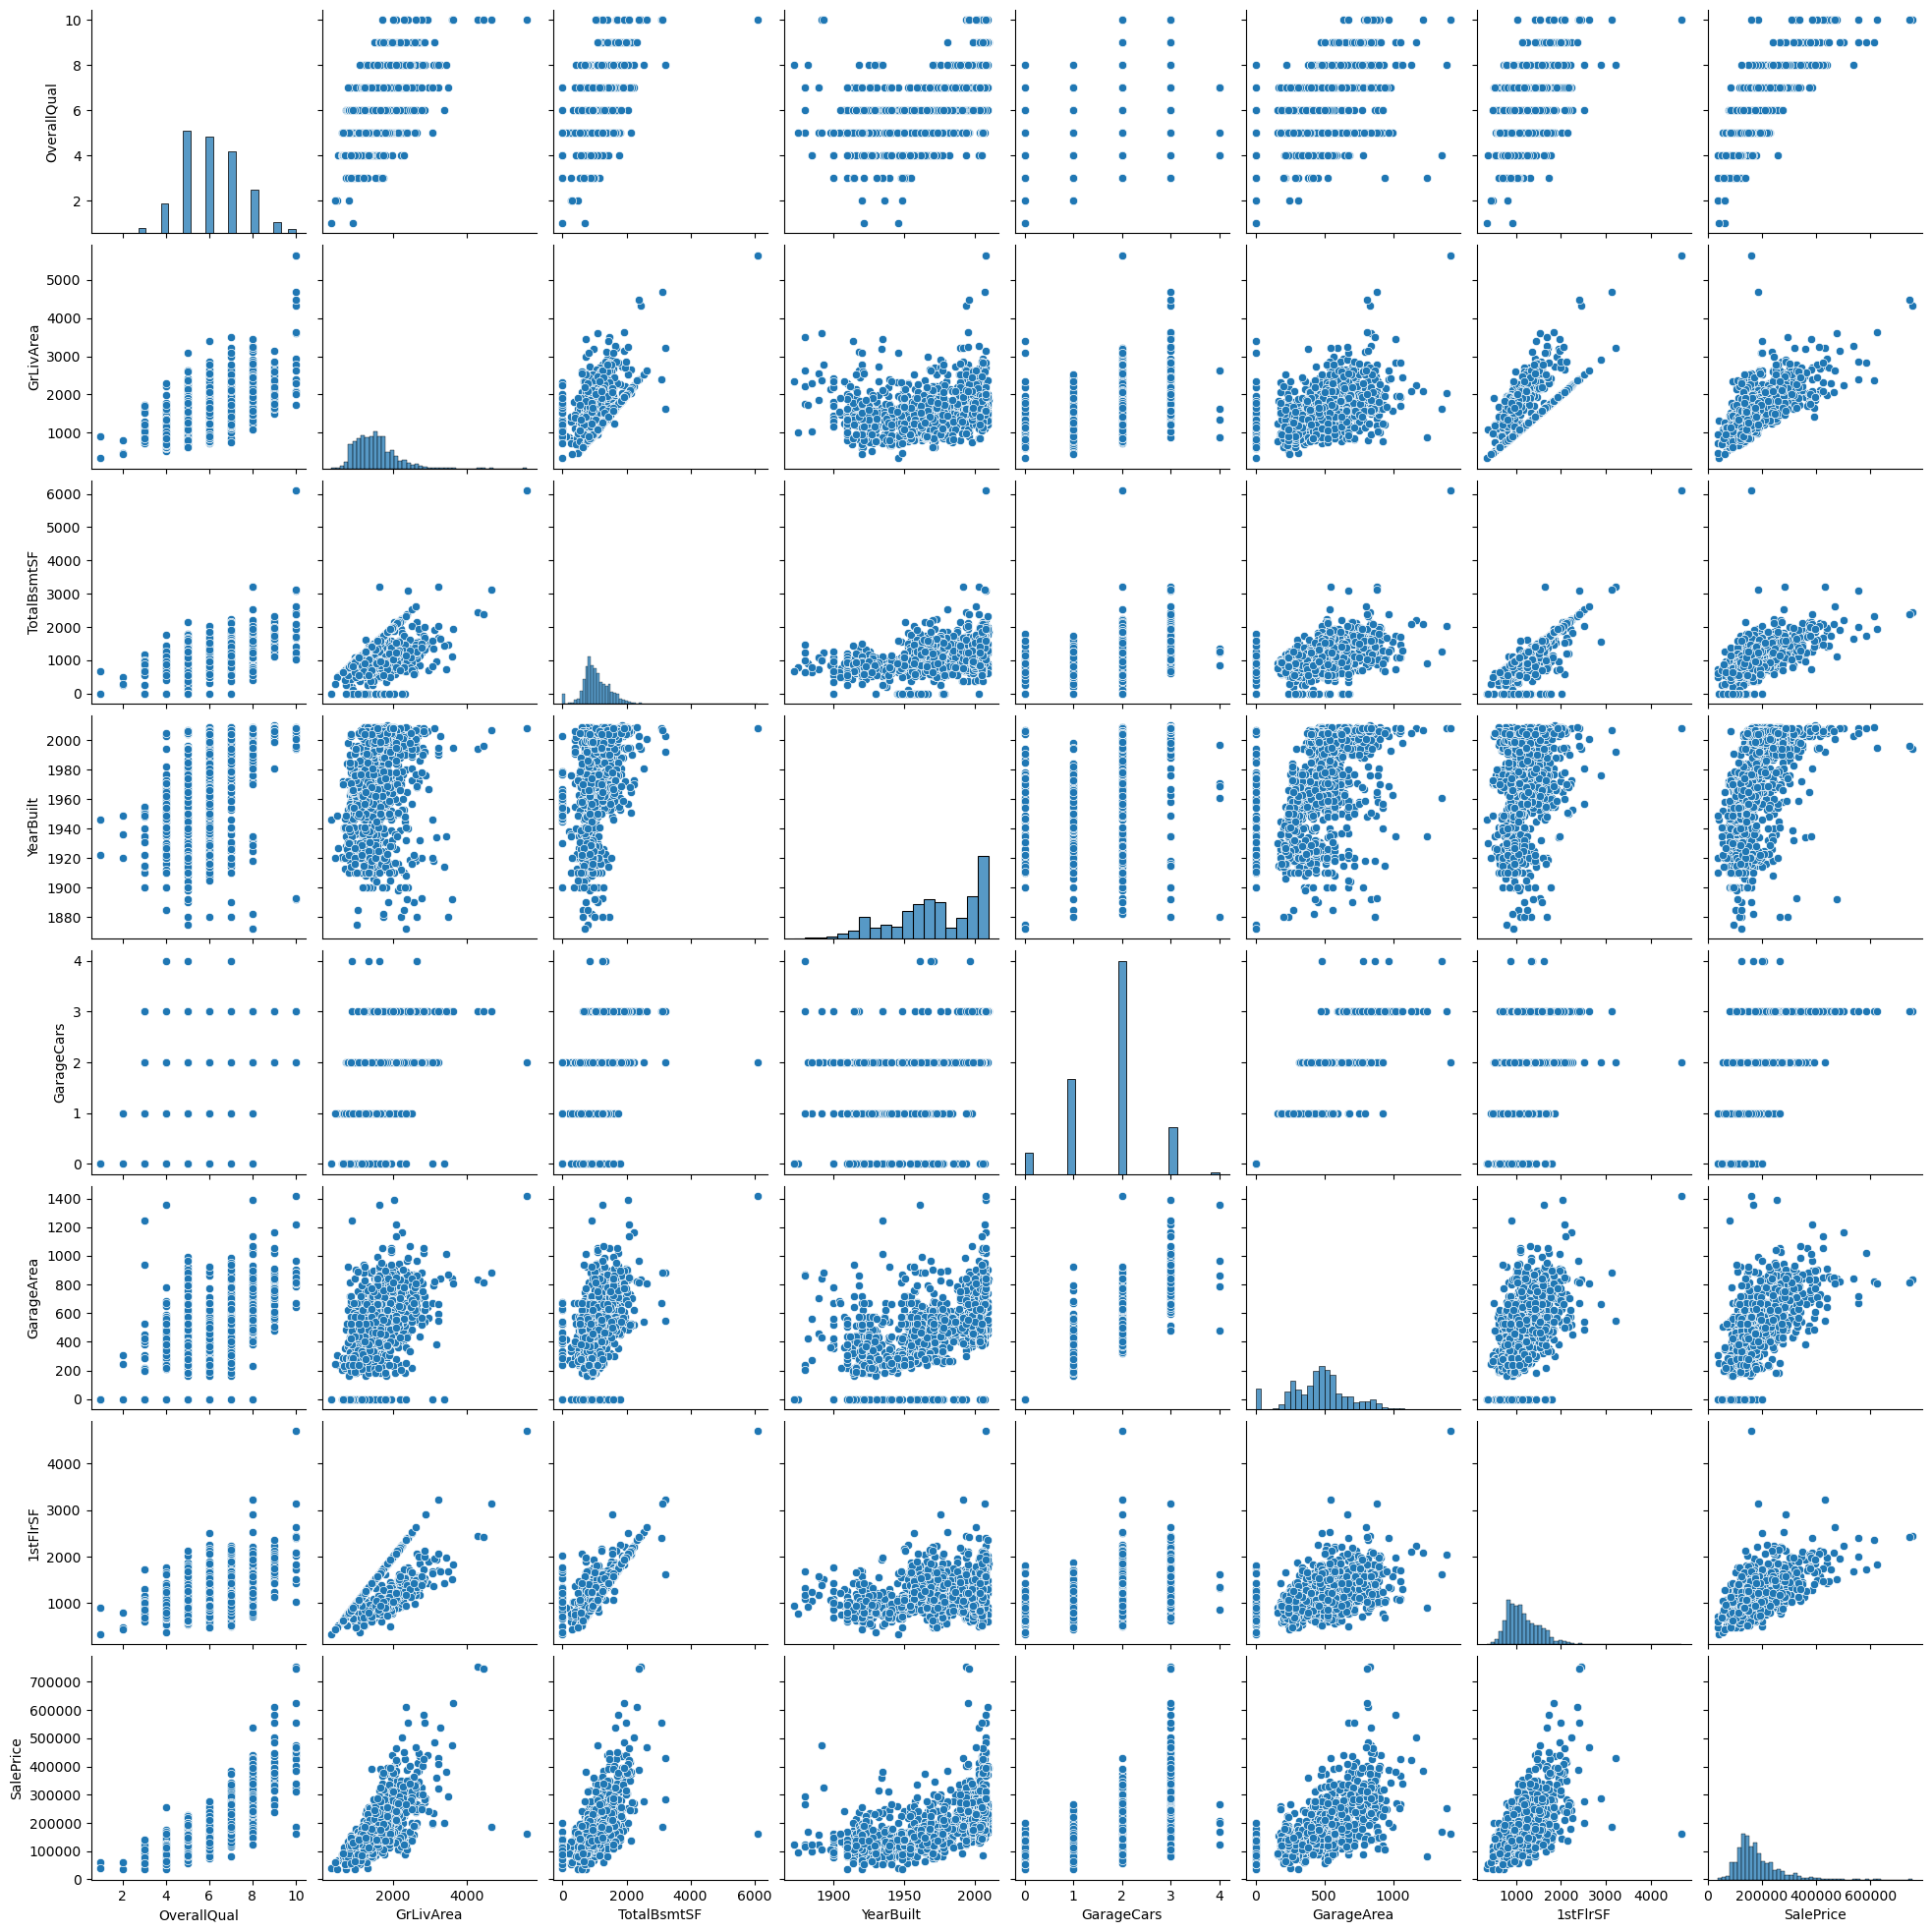

In [19]:
# Create a pairplot for the specified important features
g = sns.pairplot(df_train[df_importance])


# Show the plot
plt.show()

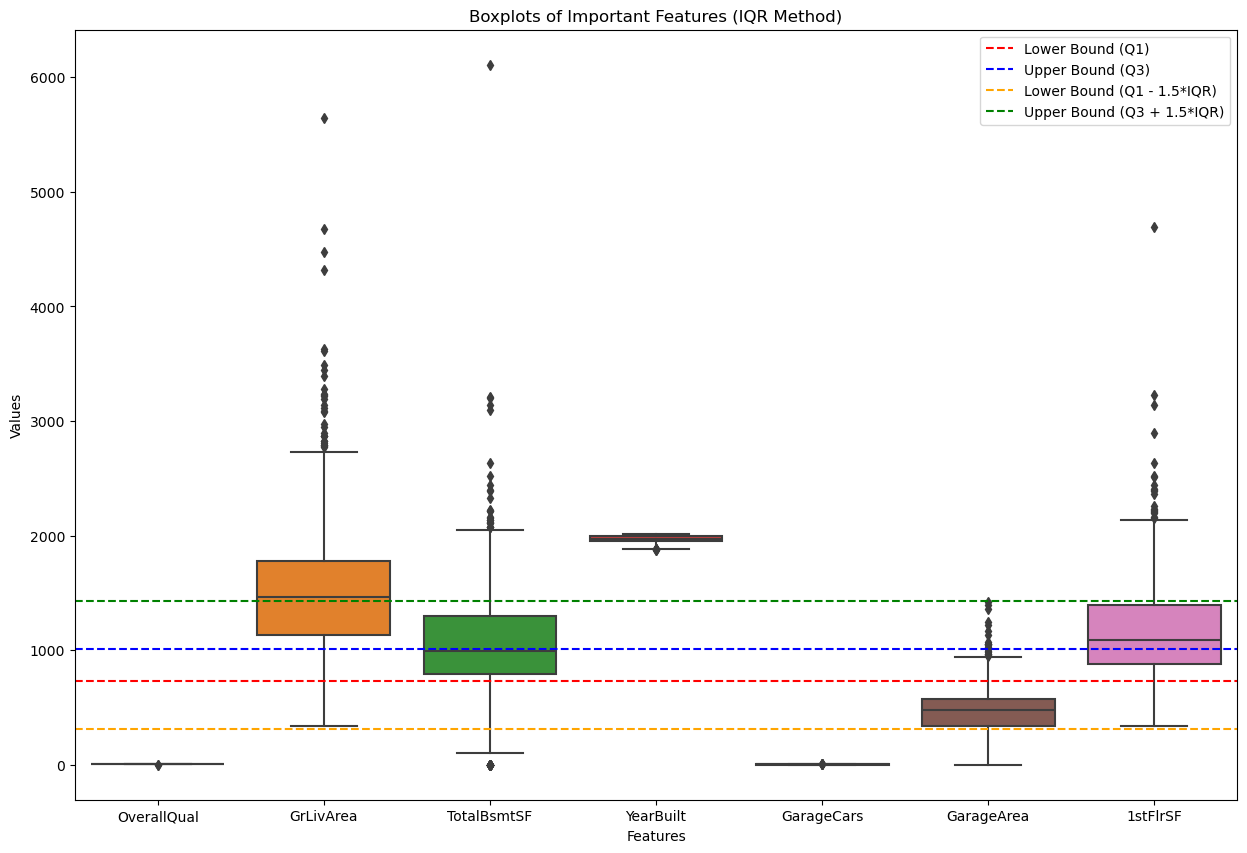

In [20]:
# Assuming df_train is your DataFrame and df_importance is defined as before
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for important features
Q1 = df_train[df_importance[:-1]].quantile(0.25)
Q3 = df_train[df_importance[:-1]].quantile(0.75)
IQR = Q3 - Q1

# Visualize the IQR using boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_train[df_importance[:-1]])
plt.title('Boxplots of Important Features (IQR Method)')
plt.ylabel('Values')
plt.xlabel('Features')
plt.axhline(Q1.mean(), color='red', linestyle='--', label='Lower Bound (Q1)')
plt.axhline(Q3.mean(), color='blue', linestyle='--', label='Upper Bound (Q3)')
plt.axhline(Q1.mean() - 1.5 * IQR.mean(), color='orange', linestyle='--', label='Lower Bound (Q1 - 1.5*IQR)')
plt.axhline(Q3.mean() + 1.5 * IQR.mean(), color='green', linestyle='--', label='Upper Bound (Q3 + 1.5*IQR)')
plt.legend()
plt.show()

In [21]:
# Define acceptable range using IQR
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# Create a mask for keeping rows within the acceptable range
#mask = ((df_train[df_importance[:-1]] >= lower_bound) & (df_train[df_importance[:-1]] <= upper_bound)).all(axis=1)

# Filter the DataFrame
#df_train_filtered = df_train[mask].reset_index(drop=True)

# Display the shape of the filtered DataFrame
#print("Filtered DataFrame shape:", df_train_filtered.shape)


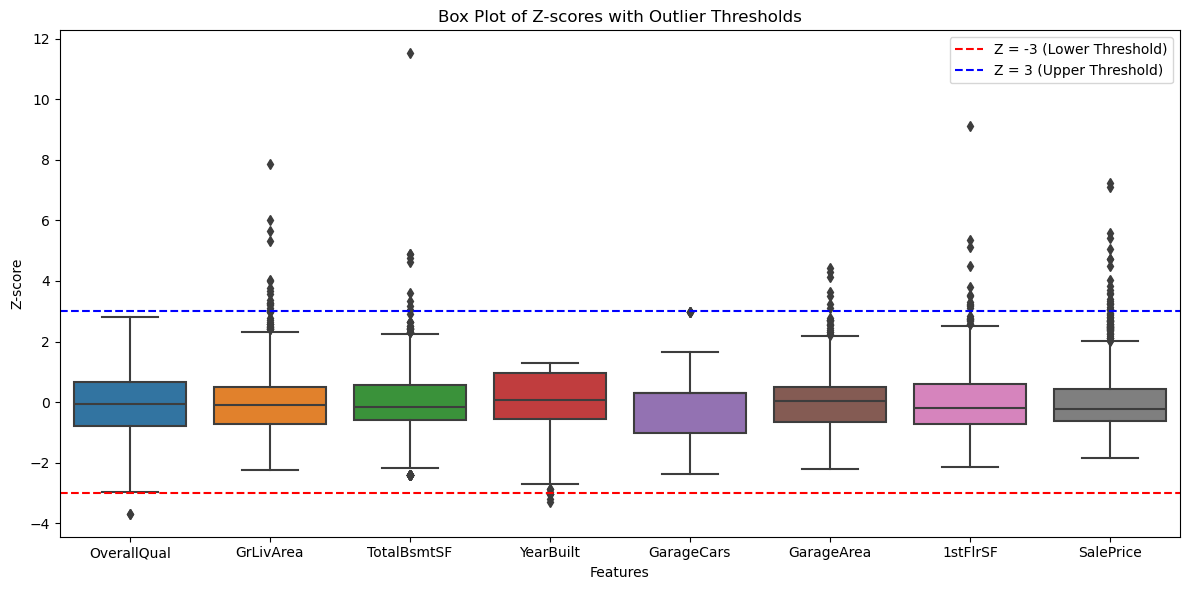

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Assuming df_train and df_importance are already defined
# Calculate Z-scores for the specified columns in the training DataFrame
z_scores = zscore(df_train[df_importance])

# Create a DataFrame for Z-scores
z_scores_df = pd.DataFrame(z_scores, columns=df_importance)

# Step 2: Plot the Z-scores
plt.figure(figsize=(12, 6))
sns.boxplot(data=z_scores_df)

# Add horizontal lines at -3 and 3
plt.axhline(y=-3, color='red', linestyle='--', label='Z = -3 (Lower Threshold)')
plt.axhline(y=3, color='blue', linestyle='--', label='Z = 3 (Upper Threshold)')

# Adding legend and titles
plt.title('Box Plot of Z-scores with Outlier Thresholds')
plt.ylabel('Z-score')
plt.xlabel('Features')
plt.legend()  # Show legend

plt.tight_layout()
plt.show()


In [23]:
# Step 3: Create a mask to filter out outliers (Z-scores outside the range -3 to 3)
#mask = (z_scores_df.abs() <= 3).all(axis=1)

# Step 4: Filter the original DataFrame based on the mask
#df_train = df_train[mask].reset_index(drop=True)

# Display the shape of the filtered DataFrame
#print("Filtered DataFrame shape:", df_train.shape)


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

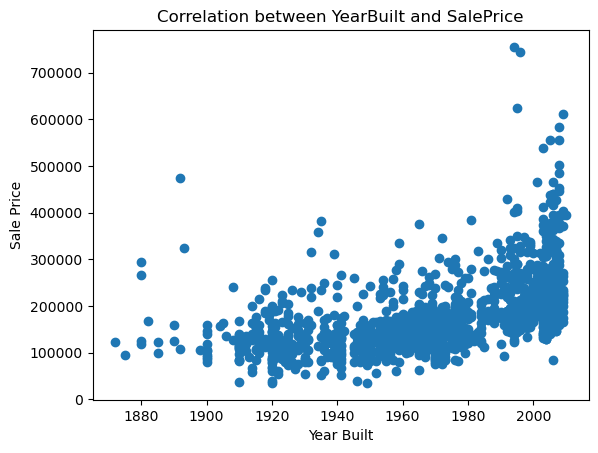

In [24]:
# Visualising Year Built to SalePrice
plt.scatter(df_train['YearBuilt'], df_train['SalePrice'])
plt.title("Correlation between YearBuilt and SalePrice")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.tight_layout

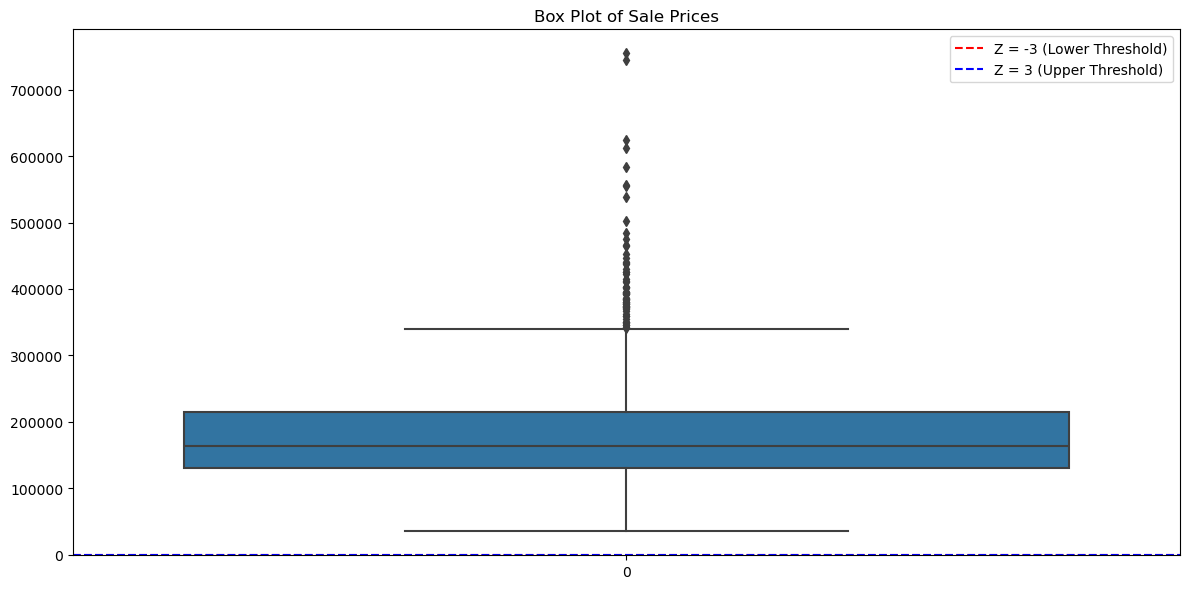

In [25]:
# Step 2: Plot the saleprice
data=df_train['SalePrice']
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)

# Add horizontal lines at -3 and 3
plt.axhline(y=-3, color='red', linestyle='--', label='Z = -3 (Lower Threshold)')
plt.axhline(y=3, color='blue', linestyle='--', label='Z = 3 (Upper Threshold)')

# Adding legend and titles
plt.title('Box Plot of Sale Prices')

plt.legend()  # Show legend

plt.tight_layout()
plt.show()

In [26]:
# Select numerical columns (adjust if necessary)
numerical_columns = df_train.select_dtypes(include=[np.number]).columns

# Function to apply log transformation safely
def safe_log(x):
    # Replace 0 or negative values with a small positive value (e.g., 1)
    return np.log(x.replace(0, 1).clip(lower=1e-10))  # clip to avoid negative infinity

# Apply the safe_log function to the numerical columns
df_train[numerical_columns] = df_train[numerical_columns].apply(safe_log)


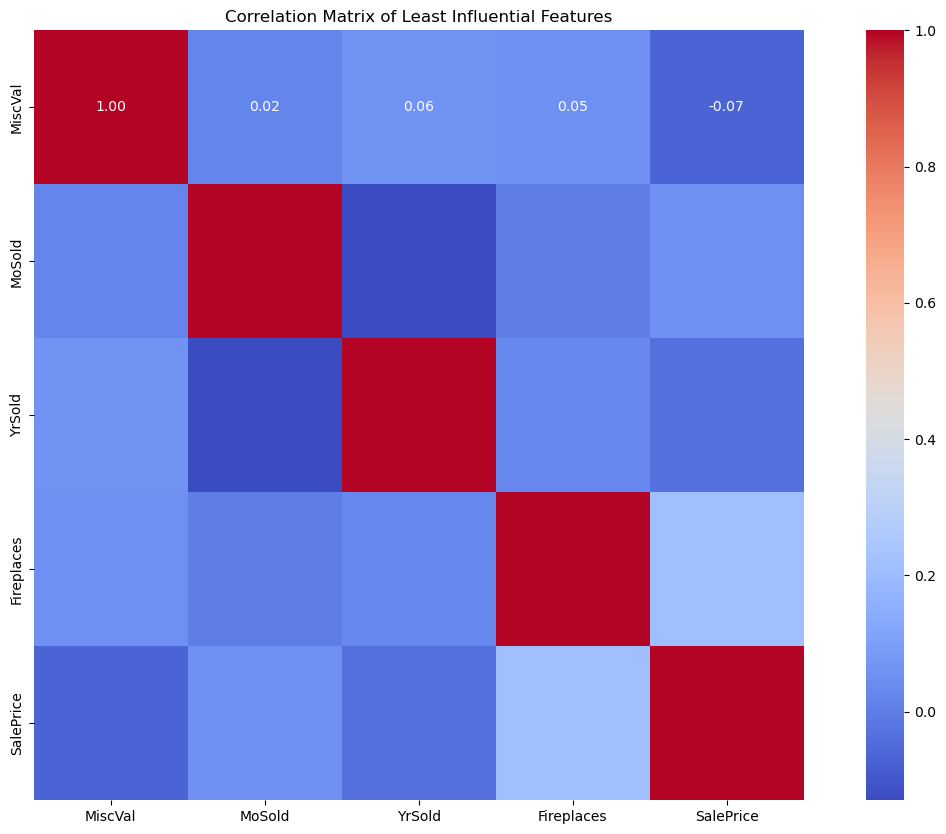

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# List of least influential features
least_influential_features = [
    "Utilities",
    "LotShape",
    "LandContour",
    "PavedDrive",
    "MiscVal",
    "MoSold",
    "YrSold",
    "Condition1",
    "Condition2",
    "Fireplaces",
    "GarageFinish"
]

# Select only the least influential features that are numeric
num_least = df_train[least_influential_features].select_dtypes(include=['int64', 'float64'])

# Add the SalePrice column to the numeric features DataFrame
num_least['SalePrice'] = df_train['SalePrice']

# Create a correlation matrix for the selected columns
correlation_matrix = num_least.corr()

# Plot the heatmap
plt.figure(figsize=(16, 10))  # Increase the figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Least Influential Features')
plt.show()


In [28]:
num_least=num_least.drop('SalePrice', axis=1)
num_least


,MiscVal,MoSold,YrSold,Fireplaces
0,0.000000,0.693147,7.604894,0.000000
1,0.000000,1.609438,7.604396,0.000000
2,0.000000,2.197225,7.604894,0.000000
3,0.000000,0.693147,7.603898,0.000000
4,0.000000,2.484907,7.604894,0.000000
...,...,...,...,...
1455,0.000000,2.079442,7.604396,0.000000
1456,0.000000,0.693147,7.605890,0.693147
1457,7.824046,1.609438,7.605890,0.693147
1458,0.000000,1.386294,7.605890,0.000000


In [29]:
df_train=df_train.drop(num_least, axis=1)

df_train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
0,0.000000,4.094345,RL,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0.000000,4.110874,0.000000,0.0,0.0,0.0,WD,Normal,12.247694
1,0.693147,2.995732,RL,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Y,5.697093,0.000000,0.000000,0.0,0.0,0.0,WD,Normal,12.109011
2,1.098612,4.094345,RL,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Y,0.000000,3.737670,0.000000,0.0,0.0,0.0,WD,Normal,12.317167
3,1.386294,4.248495,RL,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Y,0.000000,3.555348,5.605802,0.0,0.0,0.0,WD,Abnorml,11.849398
4,1.609438,4.094345,RL,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Y,5.257495,4.430817,0.000000,0.0,0.0,0.0,WD,Normal,12.429216


In [30]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency



# Step 1: Create bins for SalePrice
bins = [0, 100000, 200000, np.inf]  # Adjust the bins based on your data distribution
labels = ['Low', 'Medium', 'High']
df_train['SalePrice_Binned'] = pd.cut(df_train['SalePrice'], bins=bins, labels=labels)

# Step 2: Define the categorical features
obj_least = [
    'Utilities',
    'LotShape',
    'LandContour',
    'PavedDrive',
    'Condition1',
    'Condition2',
    'GarageFinish'
]

# Step 3: Function to perform Chi-squared test
def chi_squared_test(feature):
    # Create a contingency table
    contingency_table = pd.crosstab(df_train[feature], df_train['SalePrice_Binned'])
    
    # Perform Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    return chi2, p, contingency_table

# Step 4: Test each categorical feature and store results
chi_squared_results = {}

for feature in obj_least:
    chi2, p, contingency_table = chi_squared_test(feature)
    chi_squared_results[feature] = {
        'chi2_stat': chi2,
        'p_value': p,
        'contingency_table': contingency_table
    }

# Step 5: Display results
for feature, results in chi_squared_results.items():
    print(f"Chi-squared test results for {feature}:")
    print(f"Chi-squared Statistic: {results['chi2_stat']}, P-value: {results['p_value']}")
    print("Contingency Table:")
    print(results['contingency_table'])
    print("\n")


Chi-squared test results for Utilities:
Chi-squared Statistic: 0.0, P-value: 1.0
Contingency Table:
SalePrice_Binned   Low
Utilities             
AllPub            1459
NoSeWa               1


Chi-squared test results for LotShape:
Chi-squared Statistic: 0.0, P-value: 1.0
Contingency Table:
SalePrice_Binned  Low
LotShape             
IR1               484
IR2                41
IR3                10
Reg               925


Chi-squared test results for LandContour:
Chi-squared Statistic: 0.0, P-value: 1.0
Contingency Table:
SalePrice_Binned   Low
LandContour           
Bnk                 63
HLS                 50
Low                 36
Lvl               1311


Chi-squared test results for PavedDrive:
Chi-squared Statistic: 0.0, P-value: 1.0
Contingency Table:
SalePrice_Binned   Low
PavedDrive            
N                   90
P                   30
Y                 1340


Chi-squared test results for Condition1:
Chi-squared Statistic: 0.0, P-value: 1.0
Contingency Table:
SalePrice_Bi

In [31]:
df_train=df_train.drop(obj_least, axis=1)

df_train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice,SalePrice_Binned
0,0.000000,4.094345,RL,9.041922,Pave,Inside,Gtl,CollgCr,1Fam,2Story,...,0.000000,4.110874,0.000000,0.0,0.0,0.0,WD,Normal,12.247694,Low
1,0.693147,2.995732,RL,9.169518,Pave,FR2,Gtl,Veenker,1Fam,1Story,...,5.697093,0.000000,0.000000,0.0,0.0,0.0,WD,Normal,12.109011,Low
2,1.098612,4.094345,RL,9.328123,Pave,Inside,Gtl,CollgCr,1Fam,2Story,...,0.000000,3.737670,0.000000,0.0,0.0,0.0,WD,Normal,12.317167,Low
3,1.386294,4.248495,RL,9.164296,Pave,Corner,Gtl,Crawfor,1Fam,2Story,...,0.000000,3.555348,5.605802,0.0,0.0,0.0,WD,Abnorml,11.849398,Low
4,1.609438,4.094345,RL,9.565214,Pave,FR2,Gtl,NoRidge,1Fam,2Story,...,5.257495,4.430817,0.000000,0.0,0.0,0.0,WD,Normal,12.429216,Low


In [32]:
df_train.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,TotRmsAbvGrd,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.289316,3.791061,9.110838,1.780785,1.698488,7.586314,7.593252,4.226861,0.654852,5.645358,...,1.843789,0.532146,5.805984,2.453728,2.297724,0.696706,0.085565,0.410173,0.030423,12.024051
std,0.989031,0.704706,0.517448,0.241359,0.202222,0.015397,0.010429,2.992010,1.843780,1.854735,...,0.249764,0.379854,1.454830,2.593452,2.145428,1.724464,0.666099,1.401573,0.438563,0.399452
min,0.000000,2.995732,7.170120,0.000000,0.000000,7.534763,7.575585,0.000000,0.000000,0.000000,...,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460242
25%,5.901949,2.995732,8.929766,1.609438,1.609438,7.577634,7.584265,0.000000,0.000000,5.407172,...,1.609438,0.000000,5.812607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.775097
50%,6.593729,3.912023,9.156781,1.791759,1.609438,7.587311,7.597898,5.949339,0.000000,6.168559,...,1.791759,0.693147,6.173786,0.000000,3.218876,0.000000,0.000000,0.000000,0.000000,12.001505
75%,6.998738,4.248495,9.358890,1.945910,1.791759,7.600902,7.602900,6.568429,0.000000,6.694562,...,1.945910,0.693147,6.356108,5.123964,4.219508,0.000000,0.000000,0.000000,0.000000,12.273731
max,7.286192,5.247024,12.279532,2.302585,2.197225,7.605890,7.605890,8.638348,7.295735,7.756195,...,2.639057,1.386294,7.257003,6.753438,6.304449,6.313548,6.230481,6.173786,6.603944,13.534473


In [33]:
other_features=['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
df_train=df_train.drop(other_features, axis=1)
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,SalePrice_Binned
0,0.000000,4.094345,RL,9.041922,Pave,Inside,Gtl,CollgCr,1Fam,2Story,...,0.693147,6.306275,TA,TA,0.000000,4.110874,WD,Normal,12.247694,Low
1,0.693147,2.995732,RL,9.169518,Pave,FR2,Gtl,Veenker,1Fam,1Story,...,0.693147,6.131226,TA,TA,5.697093,0.000000,WD,Normal,12.109011,Low
2,1.098612,4.094345,RL,9.328123,Pave,Inside,Gtl,CollgCr,1Fam,2Story,...,0.693147,6.410175,TA,TA,0.000000,3.737670,WD,Normal,12.317167,Low
3,1.386294,4.248495,RL,9.164296,Pave,Corner,Gtl,Crawfor,1Fam,2Story,...,1.098612,6.464588,TA,TA,0.000000,3.555348,WD,Abnorml,11.849398,Low
4,1.609438,4.094345,RL,9.565214,Pave,FR2,Gtl,NoRidge,1Fam,2Story,...,1.098612,6.728629,TA,TA,5.257495,4.430817,WD,Normal,12.429216,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7.283448,4.094345,RL,8.976768,Pave,Inside,Gtl,Gilbert,1Fam,2Story,...,0.693147,6.131226,TA,TA,0.000000,3.688879,WD,Normal,12.072541,Low
1456,7.284135,2.995732,RL,9.486076,Pave,Inside,Gtl,NWAmes,1Fam,1Story,...,0.693147,6.214608,TA,TA,5.855072,0.000000,WD,Normal,12.254863,Low
1457,7.284821,4.248495,RL,9.109636,Pave,Inside,Gtl,Crawfor,1Fam,2Story,...,0.000000,5.529429,TA,TA,0.000000,4.094345,WD,Normal,12.493130,Low
1458,7.285507,2.995732,RL,9.181632,Pave,Inside,Gtl,NAmes,1Fam,1Story,...,0.000000,5.480639,TA,TA,5.902633,0.000000,WD,Normal,11.864462,Low


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Id                1460 non-null   float64 
 1   MSSubClass        1460 non-null   float64 
 2   MSZoning          1460 non-null   object  
 3   LotArea           1460 non-null   float64 
 4   Street            1460 non-null   object  
 5   LotConfig         1460 non-null   object  
 6   LandSlope         1460 non-null   object  
 7   Neighborhood      1460 non-null   object  
 8   BldgType          1460 non-null   object  
 9   HouseStyle        1460 non-null   object  
 10  OverallQual       1460 non-null   float64 
 11  OverallCond       1460 non-null   float64 
 12  YearBuilt         1460 non-null   float64 
 13  YearRemodAdd      1460 non-null   float64 
 14  RoofStyle         1460 non-null   object  
 15  RoofMatl          1460 non-null   object  
 16  Exterior1st       1460 n

In [35]:
df_train["SalePrice_Binned"]

0       Low
1       Low
2       Low
3       Low
4       Low
       ... 
1455    Low
1456    Low
1457    Low
1458    Low
1459    Low
Name: SalePrice_Binned, Length: 1460, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [36]:
df_train=df_train.drop('SalePrice_Binned', axis=1)

In [37]:
### Encode Object columns

In [38]:
# Separate the target variable from the features
df = df_train.drop('SalePrice', axis=1)

# Select only the categorical features from the DataFrame
categorical_df = df.select_dtypes(include=['object', 'category'])

# Use pd.get_dummies() to encode only the categorical features
encoded_df = pd.get_dummies(categorical_df, drop_first=True)

# Combine the encoded categorical features with the rest of the numerical features
df_final = pd.concat([df.drop(columns=categorical_df.columns), encoded_df], axis=1)

# Display the first 10 rows of the final DataFrame
df_final.head(10)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,4.094345,9.041922,1.945910,1.609438,7.602401,7.602401,6.559615,0.000000,5.010635,...,False,False,False,False,True,False,False,False,True,False
1,0.693147,2.995732,9.169518,1.791759,2.079442,7.588830,7.588830,6.885510,0.000000,5.648974,...,False,False,False,False,True,False,False,False,True,False
2,1.098612,4.094345,9.328123,1.945910,1.609438,7.601402,7.601902,6.186209,0.000000,6.073045,...,False,False,False,False,True,False,False,False,True,False
3,1.386294,4.248495,9.164296,1.945910,1.609438,7.557473,7.585789,5.375278,0.000000,6.291569,...,False,False,False,False,True,False,False,False,False,False
4,1.609438,4.094345,9.565214,2.079442,1.609438,7.600902,7.600902,6.484635,0.000000,6.194405,...,False,False,False,False,True,False,False,False,True,False
5,1.791759,3.912023,9.554993,1.609438,1.609438,7.597396,7.598399,6.595781,0.000000,4.158883,...,False,False,False,False,True,False,False,False,True,False
6,1.945910,2.995732,9.218705,2.079442,1.609438,7.602900,7.603399,7.221836,0.000000,5.758902,...,False,False,False,False,True,False,False,False,True,False
7,2.079442,4.094345,9.247829,1.945910,1.791759,7.587311,7.587311,6.755769,3.465736,5.375278,...,False,False,False,False,True,False,False,False,True,False
8,2.197225,3.912023,8.719317,1.945910,1.609438,7.565793,7.575585,0.000000,0.000000,6.858565,...,False,False,False,False,True,False,False,False,False,False
9,2.302585,5.247024,8.911934,1.609438,1.791759,7.569928,7.575585,6.746412,0.000000,4.941642,...,False,False,False,False,True,False,False,False,True,False


In [39]:
# drop ID
df_final=df_final.drop('Id', axis=1)

In [40]:
df_final.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.791061,9.110838,1.780785,1.698488,7.586314,7.593252,4.226861,0.654852,5.645358,6.749534,...,0.000950,0.389446,0.005697,1.010364,0.032364,1.843789,0.532146,5.805984,2.453728,2.297724
std,0.704706,0.517448,0.241359,0.202222,0.015397,0.010429,2.992010,1.843780,1.854735,1.145685,...,0.025646,0.358373,0.062603,0.312530,0.148361,0.249764,0.379854,1.454830,2.593452,2.145428
min,2.995732,7.170120,0.000000,0.000000,7.534763,7.575585,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000
25%,2.995732,8.929766,1.609438,1.609438,7.577634,7.584265,0.000000,0.000000,5.407172,6.679285,...,0.000000,0.000000,0.000000,0.693147,0.000000,1.609438,0.000000,5.812607,0.000000,0.000000
50%,3.912023,9.156781,1.791759,1.609438,7.587311,7.597898,5.949339,0.000000,6.168559,6.899219,...,0.000000,0.693147,0.000000,1.098612,0.000000,1.791759,0.693147,6.173786,0.000000,3.218876
75%,4.248495,9.358890,1.945910,1.791759,7.600902,7.602900,6.568429,0.000000,6.694562,7.168772,...,0.000000,0.693147,0.000000,1.098612,0.000000,1.945910,0.693147,6.356108,5.123964,4.219508
max,5.247024,12.279532,2.302585,2.197225,7.605890,7.605890,8.638348,7.295735,7.756195,8.717682,...,0.693147,1.098612,0.693147,2.079442,1.098612,2.639057,1.386294,7.257003,6.753438,6.304449


C:\Users\chiso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<IPython.core.display.Javascript object>

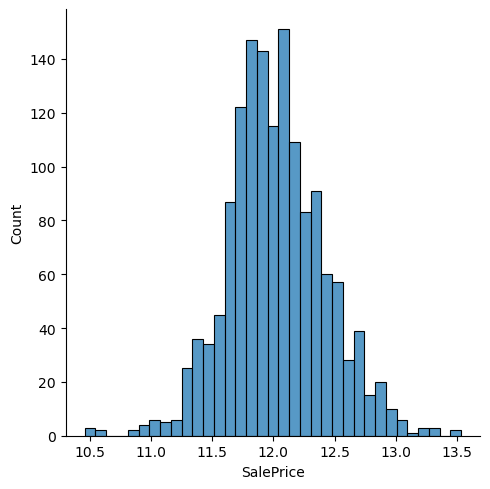

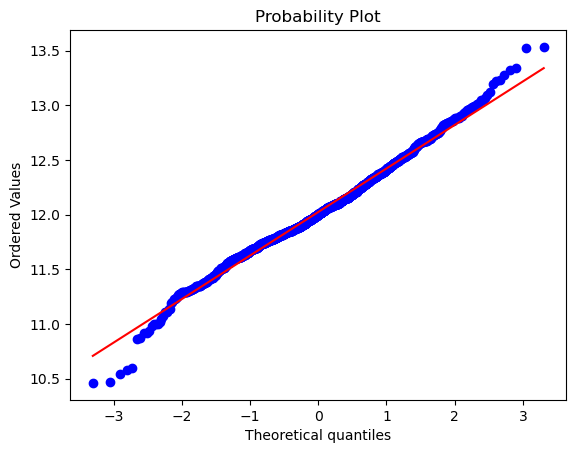

In [41]:
#histogram and normal probability plot
sns.displot(df_train['SalePrice'], fill=True);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [42]:
df_train.shape

(1460, 57)

In [43]:
test.shape

(1459, 80)

### Apply cleaning steps to train data 

In [44]:
# Step 1: Remove the target variables from df_train before comparing with the test set
df_train_ = df_train.drop(['SalePrice'], axis=1)

# Step 2: Identify columns in 'test' that are not in 'df_train_'
columns_not_in_train = test.columns.difference(df_train_.columns)
print("Columns in test but not in df_train_:", columns_not_in_train)

# Step 3: Drop these columns from 'test'
test = test.drop(columns=columns_not_in_train)

# Step 4: Reorder the columns in 'test' to match the order in 'df_train_'
test = test[df_train_.columns]

# Step 5: Verify that both DataFrames now have the same columns
assert test.columns.equals(df_train_.columns), "The column structures are still not the same."

# Display the final shape of the test DataFrame
print("Final shape of the test DataFrame:", test.shape)


Columns in test but not in df_train_: Index(['3SsnPorch', 'Alley', 'Condition1', 'Condition2', 'EnclosedPorch',
       'Fence', 'FireplaceQu', 'Fireplaces', 'GarageFinish', 'GarageYrBlt',
       'LandContour', 'LotFrontage', 'LotShape', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'MiscVal', 'MoSold', 'PavedDrive', 'PoolArea', 'PoolQC',
       'ScreenPorch', 'Utilities', 'YrSold'],
      dtype='object')
Final shape of the test DataFrame: (1459, 56)


In [45]:
#test = test.iloc[:df_train.shape[0]]

# Step 2: Reindex test DataFrame to ensure indices align with df_train (if necessary)
#test = test.reset_index(drop=True)
#df_train = df_train.reset_index(drop=True)

# Step 3: Verify the final row and column shapes of both DataFrames
#print("Final shape of the test DataFrame:", test.shape)
#print("Final shape of the df_train DataFrame:", df_train.shape)

In [46]:
df_final

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.094345,9.041922,1.945910,1.609438,7.602401,7.602401,6.559615,0.000000,5.010635,6.752270,...,False,False,False,False,True,False,False,False,True,False
1,2.995732,9.169518,1.791759,2.079442,7.588830,7.588830,6.885510,0.000000,5.648974,7.140453,...,False,False,False,False,True,False,False,False,True,False
2,4.094345,9.328123,1.945910,1.609438,7.601402,7.601902,6.186209,0.000000,6.073045,6.824374,...,False,False,False,False,True,False,False,False,True,False
3,4.248495,9.164296,1.945910,1.609438,7.557473,7.585789,5.375278,0.000000,6.291569,6.628041,...,False,False,False,False,True,False,False,False,False,False
4,4.094345,9.565214,2.079442,1.609438,7.600902,7.600902,6.484635,0.000000,6.194405,7.043160,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.094345,8.976768,1.791759,1.609438,7.600402,7.600902,0.000000,0.000000,6.859615,6.859615,...,False,False,False,False,True,False,False,False,True,False
1456,2.995732,9.486076,1.791759,1.791759,7.589842,7.594884,6.672033,5.093750,6.378426,7.340836,...,False,False,False,False,True,False,False,False,True,False
1457,4.248495,9.109636,1.945910,2.197225,7.570959,7.603898,5.616771,0.000000,6.776507,7.049255,...,False,False,False,False,True,False,False,False,True,False
1458,2.995732,9.181632,1.609438,1.791759,7.575585,7.598900,3.891820,6.936343,0.000000,6.982863,...,False,False,False,False,True,False,False,False,True,False


### Apply preprocessing and transformtion steps to test data

In [47]:


# Define categorical and numerical columns
categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df_train.drop(['SalePrice', 'Id'], axis=1).select_dtypes(include=[np.number]).columns.tolist()

# Step 1: Fill missing values in the test DataFrame
# Impute missing values for categorical columns with 'Nill'
test[categorical_columns] = test[categorical_columns].fillna('Nill')

# Impute missing values for numerical columns with 0
test[numerical_columns] = test[numerical_columns].fillna(0)

# Step 2: Apply log transformation to the numerical columns
# Ensure to avoid log transformation of zero or negative values
# Log transform will handle zeros since log(0) is undefined
test[numerical_columns] = np.log1p(test[numerical_columns])  # Applies log(1 + x)

# Step 3: Create dummy variables for categorical columns
test_categorical = pd.get_dummies(test[categorical_columns], drop_first=True)

# Step 4: Ensure that test_categorical has the same columns as the training data's categorical columns
# Get the columns expected by the training set's dummies
expected_categorical_columns = pd.get_dummies(df_train[categorical_columns], drop_first=True).columns

# Add missing columns with a default value of 0
for col in expected_categorical_columns:
    if col not in test_categorical.columns:
        test_categorical[col] = 0

# Reorder columns to match the training data's categorical order
test_categorical = test_categorical.reindex(columns=expected_categorical_columns, fill_value=0)

# Step 5: Combine the processed categorical data with the test numerical data
test_final = pd.concat([test[numerical_columns], test_categorical.reset_index(drop=True)], axis=1)

# Display the shapes to confirm they match
print("Shape of transformed test_final (test data):", test_final.shape)
print("Shape of df_final:", df_final.shape)

Shape of transformed test_final (test data): (1459, 201)
Shape of df_final: (1460, 201)


In [48]:
# create Model for predictions

In [49]:
from sklearn.svm import SVR
#from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Prepare training and test sets
X_train = df_final  # Features from training data
X_test = test_final  # Drop ID column from test set
y_train = df_train['SalePrice']  # Target variable

model=SVR()
# Fit the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
#mae = mean_absolute_error(y_train, y_pred)
#mse = mean_squared_error(y_train, y_pred)
#rmse = math.sqrt(mse)  # Calculate Root Mean Squared Error
#r2 = r2_score(y_train, y_pred)  # Calculate R-squared

# Display metrics
#print("Mean Absolute Error (MAE):", mae)
#print("Mean Squared Error (MSE):", mse)
#print("Root Mean Squared Error (RMSE):", rmse)
#print("R-squared (R2):", r2)


In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import numpy as np
import math



# Prepare training and test sets
X_train = df_final  # Features from training data
X_test = test_final  # Drop ID column from test set
y_train = df_train['SalePrice']  # Target variable

model_GBR =  GradientBoostingRegressor(n_estimators=1100)# Fit the model
model_GBR.fit(X_train, y_train)

# Predict on the test data
y_pred_GBR = model.predict(X_test)

# Calculate evaluation metrics
#mae_GBR = mean_absolute_error(y_train, y_pred_GBR)
#mse_GBR = mean_squared_error(y_train, y_pred_GBR)
#rmse_GBR = math.sqrt(mse_GBR)  # Calculate Root Mean Squared Error
#r2_GBR = r2_score(y_train, y_pred_GBR)  # Calculate R-squared

# Display metrics
#print("Mean Absolute Error (MAE):", mae_GBR)
#print("Mean Squared Error (MSE):", mse_GBR)
#print("Root Mean Squared Error (RMSE):", rmse_GBR)
#print("R-squared (R2):", r2_GBR)


### final step

In [51]:
predictions=pd.DataFrame({'Id': test['Id'], 'SalePrice':np.exp(y_pred)})
predictions.to_csv('predictions_svm.csv', index=False)
predictions

,Id,SalePrice
0,1461,135809.189194
1,1462,188186.274792
2,1463,200830.366155
3,1464,213512.289167
4,1465,202304.210459
...,...,...
1454,2915,92416.030252
1455,2916,100363.570895
1456,2917,174547.873158
1457,2918,122881.359923


In [52]:
predictions_GBR=pd.DataFrame({'Id': test['Id'], 'SalePrice':np.exp(y_pred_GBR)})
predictions_GBR.to_csv('predictions_gbr.csv', index=False)
predictions_GBR.head(7)

,Id,SalePrice
0,1461,135809.189194
1,1462,188186.274792
2,1463,200830.366155
3,1464,213512.289167
4,1465,202304.210459
5,1466,184266.529556
6,1467,187675.618062


In [53]:
model.score(X_train, y_train)

0.8929823592106032

In [54]:
model_GBR.score(X_train, y_train)

0.9965238572999595